# Importing required modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
#sdsdsdsds



# Getting in the data 

In [2]:
data=pd.read_csv('gold_rate_history.csv')
print(data.shape)
print(data.head())

(4971, 6)
       Date Country      State Location  Pure Gold (24 k)  \
0  1/2/2006   India  Tamilnadu  Chennai             768.0   
1  1/3/2006   India  Tamilnadu  Chennai             770.5   
2  1/4/2006   India  Tamilnadu  Chennai             784.5   
3  1/5/2006   India  Tamilnadu  Chennai             782.5   
4  1/6/2006   India  Tamilnadu  Chennai             776.0   

   Standard Gold (22 K)  
0                 711.0  
1                 713.0  
2                 726.0  
3                 725.0  
4                 719.0  


In [3]:

data["Date"]=pd.to_datetime(data["Date"])
original_x=data["Date"]
data['Date']=data['Date'].map(dt.datetime.toordinal)
x=data["Date"]

y=data["Pure Gold (24 k)"]
print(data.iloc[4960:4970])

        Date Country      State Location  Pure Gold (24 k)  \
4960  737698   India  Tamilnadu  Chennai            5049.0   
4961  737699   India  Tamilnadu  Chennai            5056.0   
4962  737700   India  Tamilnadu  Chennai            5112.0   
4963  737701   India  Tamilnadu  Chennai            5093.0   
4964  737702   India  Tamilnadu  Chennai            5093.0   
4965  737703   India  Tamilnadu  Chennai            5062.0   
4966  737704   India  Tamilnadu  Chennai            5103.0   
4967  737705   India  Tamilnadu  Chennai            5046.0   
4968  737706   India  Tamilnadu  Chennai            5051.0   
4969  737707   India  Tamilnadu  Chennai            5093.0   

      Standard Gold (22 K)  
4960                4809.0  
4961                4815.0  
4962                4869.0  
4963                4850.0  
4964                4850.0  
4965                4821.0  
4966                4860.0  
4967                4806.0  
4968                4810.0  
4969                4850.0 

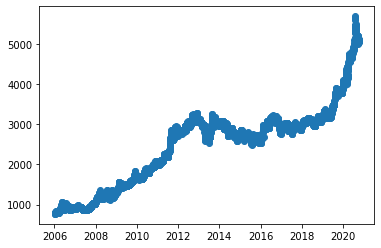

In [4]:
plt.scatter(original_x,y)
plt.show()

# calculating mean


In [5]:
x_mean=np.mean(x)
y_mean=np.mean(y)
# print(x_mean,y_mean)

num=0
dem=0
for i in range(len(x)):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
    dem+=(x[i]-x_mean)**2
m=num/dem
c=y_mean - m*x_mean
print(m,c)


0.5770046927884072 -421643.6450288568


# prediction 

2022-04-24 00:00:00 738269


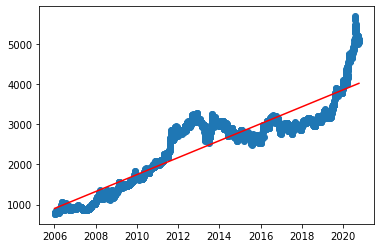

In [6]:
y_pred=m*x+c
future_date="4/24/2022"
future_date=pd.to_datetime(future_date)
modified_date=future_date.toordinal()
print(future_date,modified_date)
# modified_date=
# print(y_pred)
plt.scatter(original_x,y)
plt.plot([min(original_x),max(original_x)],[min(y_pred),max(y_pred)],color="red")
plt.show()


# Verification with Excel Trend lines

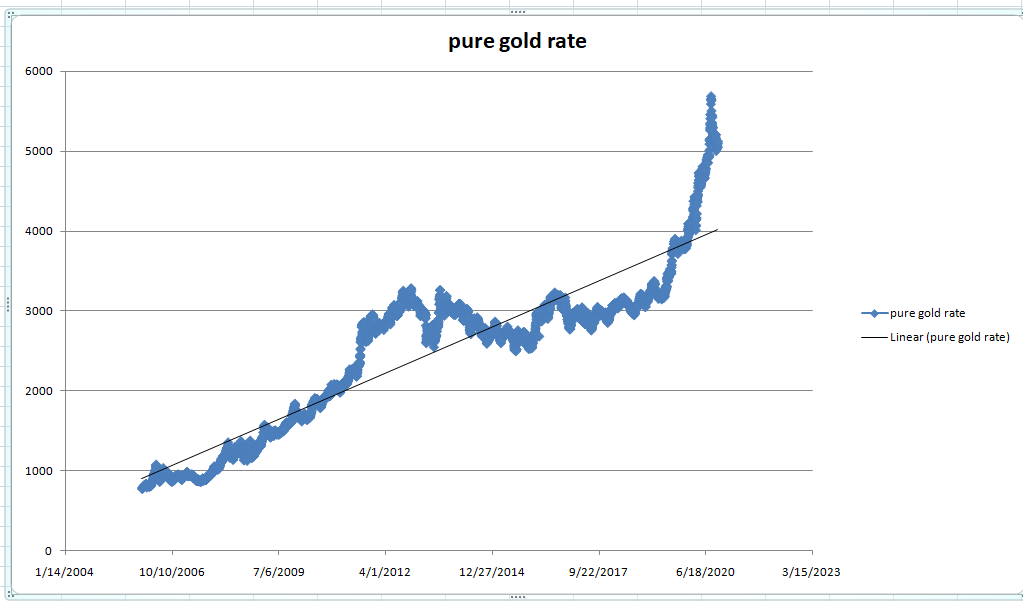


# r^2 score

In [7]:
ss_tot=0
ss_res=0
for i in range(len(x)):
    y_pred=c+m*x[i]
    ss_tot+=(y[i]-y_mean)**2
    ss_res+=(y[i]-y_pred)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.8344236047123059


# root mean square error

In [8]:
rmse=0
for i in range(len(x)):
    y_pred=c+ m*x[i]
    rmse+=(y[i]-y_pred)**2
rmse=np.sqrt(rmse/len(x))
print(rmse)

399.0770873996801
